In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('C:/Users/admin/Desktop/Nan muthalvan/seattle-weather.csv')

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [6]:
len(training_set)

1461

In [7]:
def df_to_XY(df,window_size=10):
     X_train=[]
     y_train=[]

     for i in range(10,len(training_set)):
        X_train.append(training_set[i-10:i,0])
        y_train.append(training_set[i,0])

     X_train, y_train = np.array(X_train), np.array(y_train)
     return X_train, y_train

In [8]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [9]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [11]:
# Building RNN
regressor = Sequential()

In [12]:
#Addinf the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

In [13]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100

25/25 [==============================] - 20s 205ms/step - loss: 196.3778 - val_loss: 213.9202
Epoch 2/100
25/25 [==============================] - 1s 32ms/step - loss: 78.9103 - val_loss: 129.8544
Epoch 3/100
25/25 [==============================] - 1s 32ms/step - loss: 60.2854 - val_loss: 107.6341
Epoch 4/100
25/25 [==============================] - 1s 32ms/step - loss: 56.8161 - val_loss: 95.9468
Epoch 5/100
25/25 [==============================] - 1s 32ms/step - loss: 55.5498 - val_loss: 87.5591
Epoch 6/100
25/25 [==============================] - 1s 31ms/step - loss: 54.7237 - val_loss: 83.2130
Epoch 7/100
25/25 [==============================] - 1s 32ms/step - loss: 54.8386 - val_loss: 79.2325
Epoch 8/100
25/25 [==============================] - 1s 32ms/step - loss: 53.5679 - val_loss: 77.4166
Epoch 9/100
25/25 [==============================] - 1s 32ms/step - loss: 53.8666 - val_loss: 76.5331
Epoch 10/100
25/25 [==============================] - 1s 33ms/step - loss: 

In [16]:
his = pd.DataFrame(history.history)

In [17]:
his.head()

,loss,val_loss
0,196.377808,213.920151
1,78.910271,129.854446
2,60.285362,107.634079
3,56.816143,95.946815
4,55.549824,87.559082


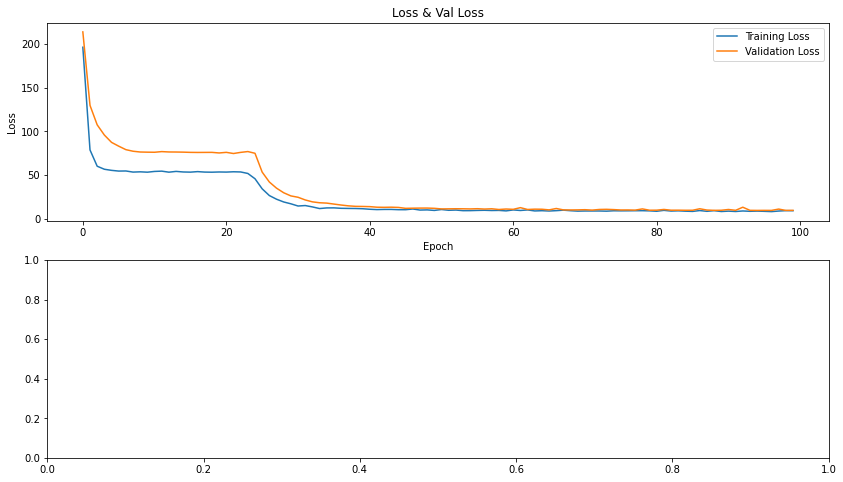

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'his' is your DataFrame containing the data
history_loss = his[['loss', 'val_loss']].reset_index()

fig, axes = plt.subplots(2, 1, figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.title("Loss & Val Loss")
sns.lineplot(data=history_loss, x='index', y='loss', label='Training Loss', palette="flare")
sns.lineplot(data=history_loss, x='index', y='val_loss', label='Validation Loss', palette="flare")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [22]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

15/15 [==============================] - 0s 9ms/step


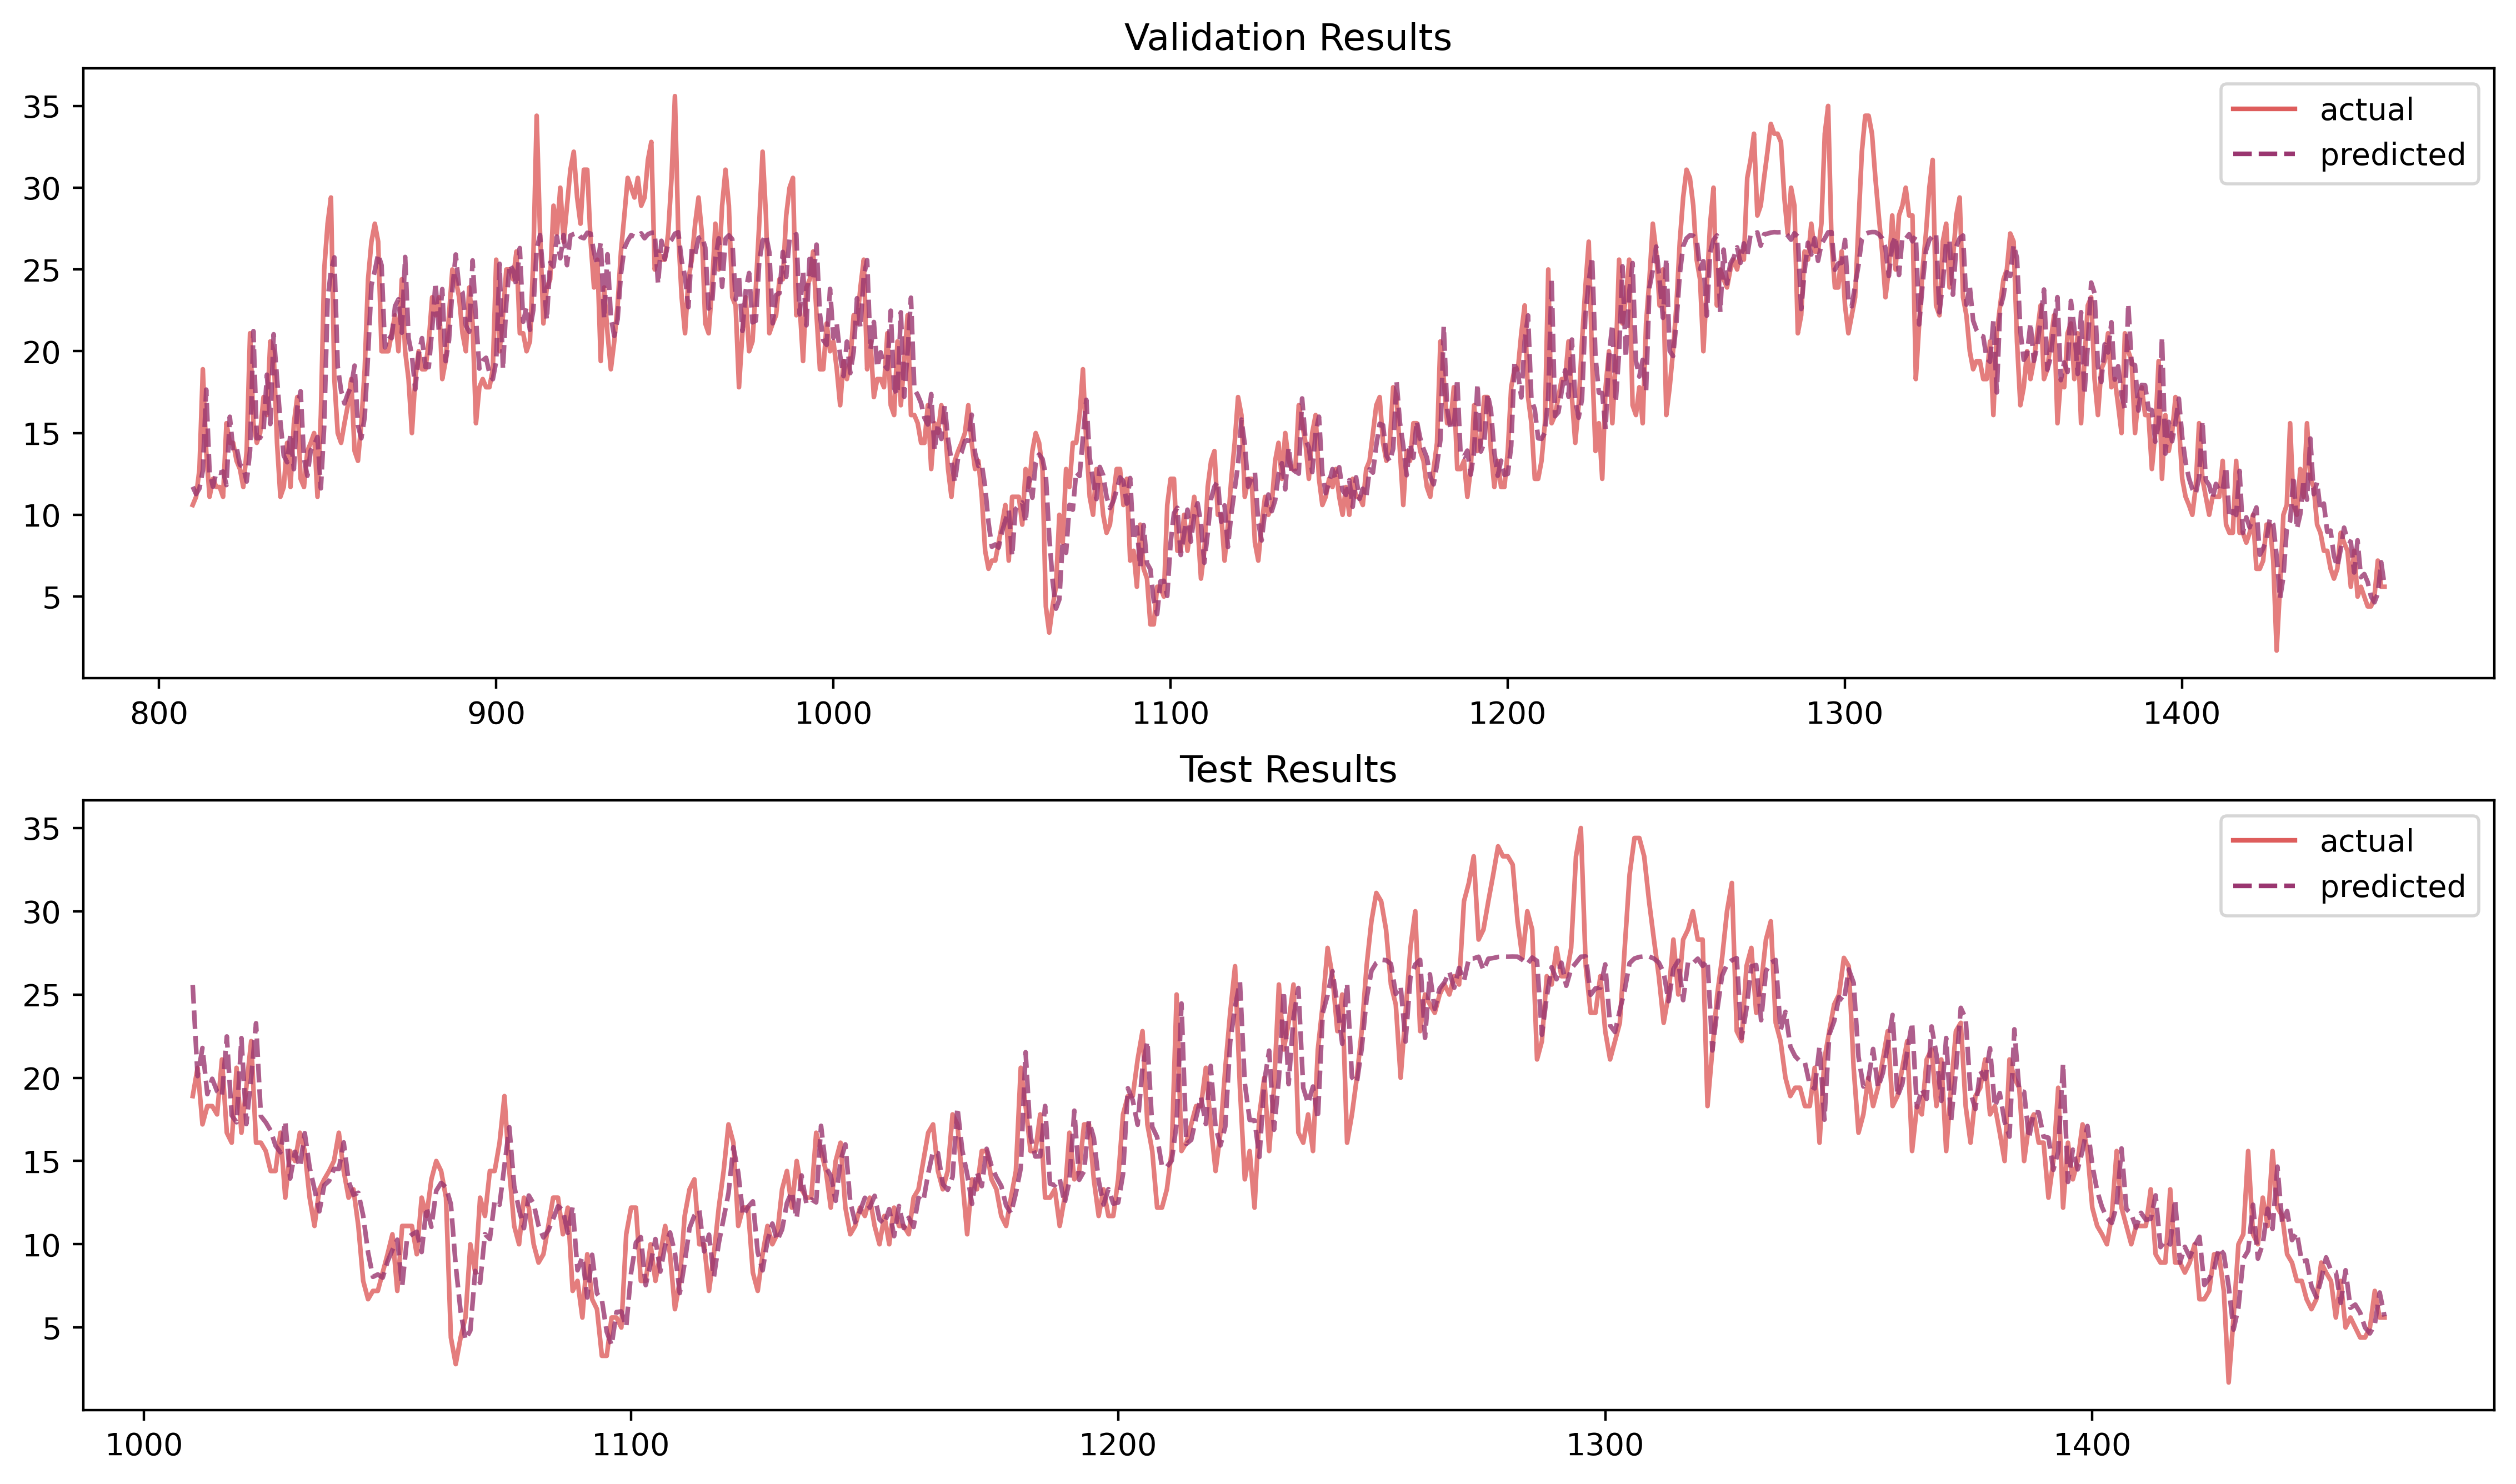

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_pred is your DataFrame
fig, axes = plt.subplots(2, 1, figsize=(14, 8), dpi=400)

plt.subplot(2, 1, 1)
plt.title("Validation Results")
sns.lineplot(data=df_pred.iloc[800:], alpha=0.8, palette="flare", linestyle=None)

plt.subplot(2, 1, 2)
plt.title("Test Results")
sns.lineplot(data=df_pred.iloc[1000:], alpha=0.8, palette="flare", linestyle=None)

plt.show()
